# K Means

Assumptions:
* the variance of the distribution of each attribute (variable) is spherical
* all variables have the same variance
* each cluster has roughly equal number of observations

Parameter selection:
* n_clusters: number of clusters to be found. The optimal number can be determined with the "elbow method".
* The remaining parameters are left by default.

Returns (attributes):
* cluster_centers_: ndarray of shape (n_clusters, n_features)
Coordinates of cluster centers. 

* labels_: ndarray of shape (n_samples,) The labels of each point, can be used to count the number of clusters or visualize their names.

* inertia_: float. Sum of squared distances of samples to their closest cluster center. Used to calculate the "elbow" value

* n_iter_: int. Number of iterations run.

In [4]:
%matplotlib inline
import math
import os
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;
sns.set()
from collections import defaultdict
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
plt.rcParams["figure.figsize"] = (12,7)

C:\Users\lalaj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
native = VariantCall(path)

In [7]:
list_18 = native.get_subunit_data('RDN18-1')
list_25 = native.get_subunit_data('RDN25-1')

# Determine n_clusters

*The elbow method*
* Runs k-means on the dataset for a given number (a range K) of possible clusters, and for each value of K it calculates the average distance (the "sum of squared distances: SSE") from the points in each cluster to the corresponding center.
* SSE tends to be lower as the number of K increases, and when it is visualized there is often an 'inflection' point in the descending curve.
* Low SSE is desirable to have defined clusters.
* The inflection is the point with a small value of k that still has a low SSE, where we start to have diminishing returns by increasing k.

The Yellowbrick visualization for the elbow method shows a dashed line at the optimal number of clusters. The number corresponds to the 'elbowatk' value. The green dashed line shows the time taken to run kmeans with each k number.

The second scatter plot is clustered with the given k number for clusters using the Yellowbrick function.

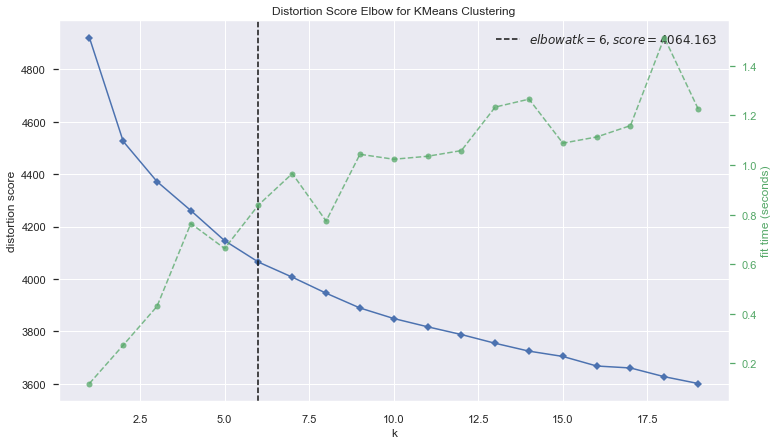

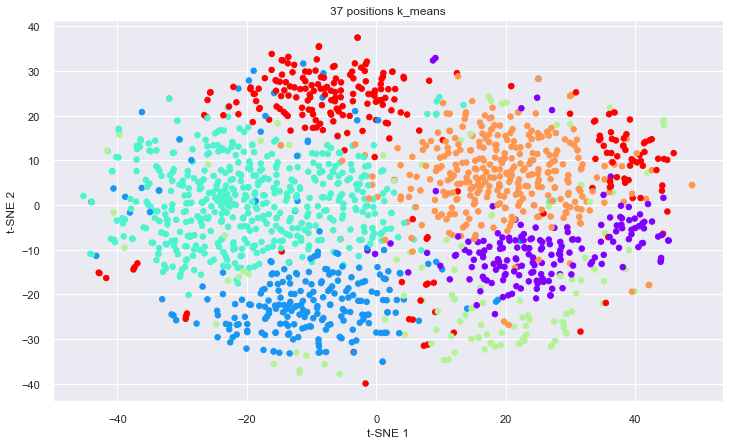

In [233]:
native.plot_tSNE_reads_covering_positions_data(list_18, 'k_means', 20) 

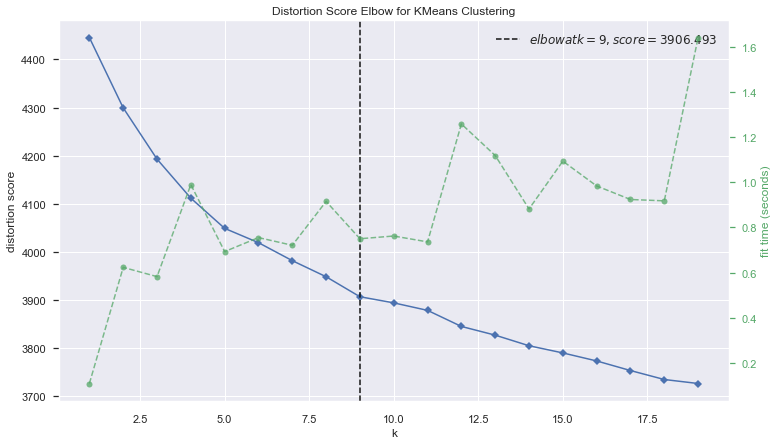

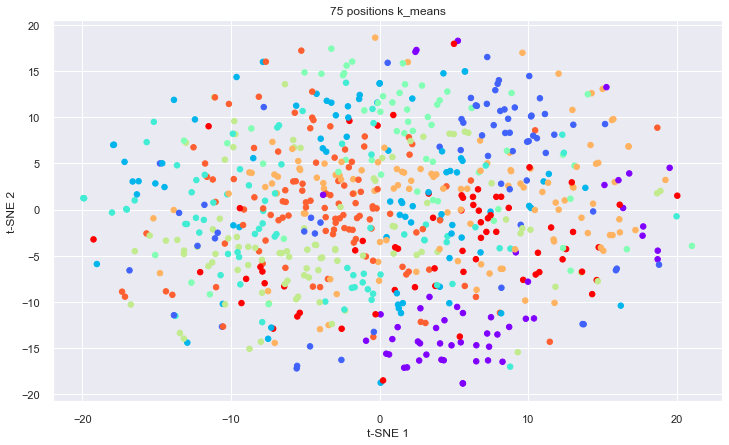

In [234]:
native.plot_tSNE_reads_covering_positions_data(list_25, 'k_means', 20)